<a href="https://colab.research.google.com/github/deeprawal14/Cyclotech/blob/main/model_training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchsummary import summary
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [ ]:
!unzip cyclone_ds.zip


unzip:  cannot find or open cyclone_ds.zip, cyclone_ds.zip.zip or cyclone_ds.zip.ZIP.


In [ ]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/Cyclotech/insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Cyclotech/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
ROOT_DIR = "/content/drive/MyDrive/Cyclotech"

In [ ]:
def get_train_file_path(id):
    return f"{TRAIN_DIR}/{id}"

In [ ]:
df = pd.read_csv(f"{ROOT_DIR}/insat_3d_ds - Sheet.csv")
df['file_path'] = df['img_name'].apply(get_train_file_path)

In [ ]:
df

,img_name,label,file_path
0,25.jpg,25,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
1,27.jpg,27,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
2,28.jpg,28,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
3,30.jpg,30,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
4,30(1).jpg,30,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
...,...,...,...
131,112.jpg,112,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
132,115.jpg,115,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
133,118.jpg,118,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
134,119.jpg,119,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...


In [ ]:
df = df.drop([df.index[32] , df.index[116], df.index[124]])

In [ ]:
df

,img_name,label,file_path
0,25.jpg,25,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
1,27.jpg,27,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
2,28.jpg,28,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
3,30.jpg,30,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
4,30(1).jpg,30,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
...,...,...,...
131,112.jpg,112,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
132,115.jpg,115,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
133,118.jpg,118,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
134,119.jpg,119,/content/drive/MyDrive/Cyclotech/insat3d_ir_cy...


In [ ]:
df.keys

<bound method NDFrame.keys of       img_name  label                                          file_path
0       25.jpg     25  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
1       27.jpg     27  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
2       28.jpg     28  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
3       30.jpg     30  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
4    30(1).jpg     30  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
..         ...    ...                                                ...
131    112.jpg    112  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
132    115.jpg    115  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
133    118.jpg    118  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
134    119.jpg    119  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...
135    128.jpg    128  /content/drive/MyDrive/Cyclotech/insat3d_ir_cy...

[133 rows x 3 columns]>

In [ ]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135],
      dtype='int64', length=133)

In [ ]:
class CycloneDataset(Dataset):
  def __init__(self, df, transforms=None):
    self.df = df
    self.file_names = df['file_path'].values
    self.labels = df['label'].values
    self.transforms = transforms

  def __len__(self):
    return len(self.df)

#transforms.compose reminder

  def __getitem__(self, index):
    img_path = self.file_names[index]
    img = cv2.imread(img_path)
    img = np.array(img)
    totensor = transforms.ToTensor()
    img = totensor(img)
    resize = transforms.Resize(size=(250, 250))
    img = resize(img)
    flip = transforms.RandomHorizontalFlip(p = 0.5)
    img = flip(img)
    label = self.labels[index]

    if self.transforms:
      img = self.transforms(image=img)["image"]

    return img, torch.tensor(label, dtype=torch.long).float()

In [ ]:
dataset = CycloneDataset(df)

In [ ]:
dataset

In [ ]:
dataset = CycloneDataset(df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
data_loader

In [ ]:
import numpy as np

In [ ]:
# for view_img, view_label in data_loader:
#   print(view_img, view_label)

In [ ]:
dataset[131]

(tensor([[[0.0633, 0.0912, 0.0940,  ..., 0.3181, 0.4042, 0.6266],
          [0.0654, 0.0884, 0.0917,  ..., 0.3406, 0.4305, 0.6331],
          [0.0706, 0.0806, 0.0815,  ..., 0.3390, 0.4414, 0.6349],
          ...,
          [0.2432, 0.2697, 0.2556,  ..., 0.2366, 0.3260, 0.6088],
          [0.2605, 0.2875, 0.2823,  ..., 0.1432, 0.1932, 0.6029],
          [0.2162, 0.2366, 0.2453,  ..., 0.2259, 0.2675, 0.6390]],
 
         [[0.1089, 0.1330, 0.1320,  ..., 0.9401, 0.9023, 0.9614],
          [0.1062, 0.1267, 0.1259,  ..., 0.9498, 0.9176, 0.9648],
          [0.1098, 0.1179, 0.1152,  ..., 0.9302, 0.9135, 0.9632],
          ...,
          [0.6198, 0.6607, 0.6699,  ..., 0.5558, 0.6057, 0.8361],
          [0.6781, 0.7210, 0.7402,  ..., 0.3544, 0.3761, 0.7449],
          [0.6580, 0.6970, 0.7323,  ..., 0.3849, 0.4010, 0.7303]],
 
         [[0.5509, 0.5852, 0.5974,  ..., 0.9296, 0.8918, 0.9555],
          [0.5626, 0.5904, 0.6016,  ..., 0.9619, 0.9301, 0.9650],
          [0.5716, 0.5859, 0.5922,  ...,

INTENSITY: 53.0 KNOTS
SIZE: torch.Size([3, 250, 250])



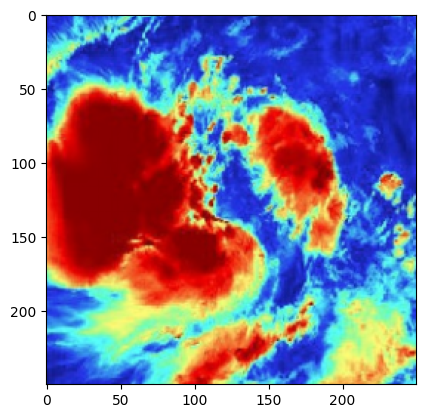

In [ ]:
#print a random image from the dataset
import random
i = random.randint(0, 132)
# x = dataset[i]["image"]
# y = dataset[i]["label"]
# size = dataset[i]["image"].shape
img, label = dataset[i]
size = img.shape
print(f"INTENSITY: {label} KNOTS")
print(f"SIZE: {size}\n")
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
for i in range(132):
  x, y = dataset[i]
  # x = dataset[i]["image"]
  print(x.shape)

torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([

In [ ]:
# RESIZE TO SAME
# DONE :D

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(784, 1),
    )
  def forward(self, x):
    return self.model(x)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = Model().to(device)
summary(model, (3, 250, 250))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 250, 250]           7,168
       BatchNorm2d-2        [-1, 256, 250, 250]             512
              ReLU-3        [-1, 256, 250, 250]               0
            Conv2d-4        [-1, 256, 250, 250]         590,080
       BatchNorm2d-5        [-1, 256, 250, 250]             512
              ReLU-6        [-1, 256, 250, 250]               0
         MaxPool2d-7        [-1, 256, 125, 125]               0
            Conv2d-8        [-1, 128, 125, 125]         295,040
       BatchNorm2d-9        [-1, 128, 125, 125]             256
             ReLU-10        [-1, 128, 125, 125]               0
           Conv2d-11        [-1, 128, 125, 125]         147,584
      BatchNorm2d-12        [-1, 128, 125, 125]             256
             ReLU-13        [-1, 128, 125, 125]               0
        MaxPool2d-14          [-1, 128,

NameError: name 'tf' is not defined

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer, train_loader):
  total = 0
  correct = 0
  for i in range(epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      labels = torch.unsqueeze(labels, 1)
      loss = criterion(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss = train_loss + loss.item()

    print(f"Epoch: {i}/{epochs} Loss: {train_loss/len(train_loader):.5f} ")
    loss_per_iteration.append(train_loss/len(train_loader))





In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 19 18:07:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              29W /  70W |   3465MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
model = Model().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.001)

model_1=train_batch(epochs=200,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            train_loader = data_loader)


Epoch: 0/200 Loss: 2559.79333 
Epoch: 1/200 Loss: 835.74055 
Epoch: 2/200 Loss: 504.79002 
Epoch: 3/200 Loss: 429.46254 
Epoch: 4/200 Loss: 444.98124 
Epoch: 5/200 Loss: 419.69786 
Epoch: 6/200 Loss: 410.59556 
Epoch: 7/200 Loss: 370.03106 
Epoch: 8/200 Loss: 334.64954 
Epoch: 9/200 Loss: 304.57251 
Epoch: 10/200 Loss: 343.28176 
Epoch: 11/200 Loss: 326.63221 
Epoch: 12/200 Loss: 305.91491 
Epoch: 13/200 Loss: 297.47961 
Epoch: 14/200 Loss: 320.32428 
Epoch: 15/200 Loss: 257.73795 
Epoch: 16/200 Loss: 330.63439 
Epoch: 17/200 Loss: 276.16215 
Epoch: 18/200 Loss: 251.77244 
Epoch: 19/200 Loss: 276.51830 
Epoch: 20/200 Loss: 284.68676 
Epoch: 21/200 Loss: 210.25346 
Epoch: 22/200 Loss: 214.30789 
Epoch: 23/200 Loss: 182.25215 
Epoch: 24/200 Loss: 178.35267 
Epoch: 25/200 Loss: 232.36069 
Epoch: 26/200 Loss: 181.05463 
Epoch: 27/200 Loss: 165.02584 
Epoch: 28/200 Loss: 139.32628 
Epoch: 29/200 Loss: 139.49277 
Epoch: 30/200 Loss: 164.78326 
Epoch: 31/200 Loss: 155.15871 
Epoch: 32/200 Los

NameError: name 'loss' is not defined

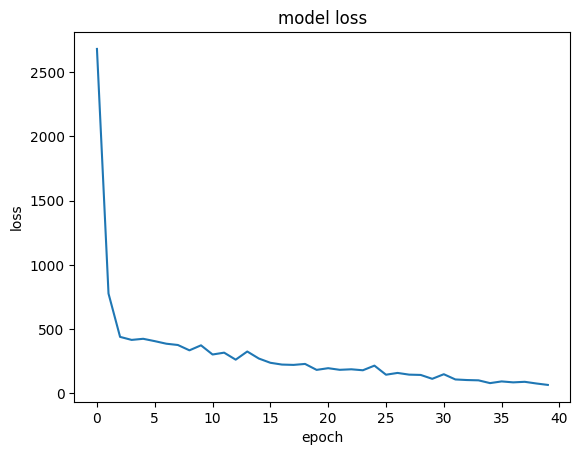

In [ ]:
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
y=  [ 2678.71305,776.71392, 440.02365 ,416.47497 ,425.11474 ,406.85648 , 386.90191 , 376.91646 ,335.45715 ,374.32649 , 303.01744 , 317.32849 ,262.85098 ,326.33722 ,271.75574 ,238.62566 ,224.74439 ,222.14368 ,229.70347 ,183.41095 ,196.61157 ,183.94779 ,188.02647 ,180.47016 ,216.44101 ,145.90688 ,159.73261 ,146.46019 ,144.15068,113.97971 , 149.65343 , 109.05124 ,104.45637, 102.18293, 80.52142, 93.74305 ,86.38584 ,90.70877 ,77.75462 , 66.51194 ]

plt.plot(x,y)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.eval()

Model(
  (model): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Cyclotech/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/112.jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(248, 248))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
model(img)

tensor([[118.8159]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
#96-112knots

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Cyclotech/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/43(2).jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(248, 248))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
model(img)

tensor([[51.6460]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
!pip install internal.utils.misc

ERROR: Could not find a version that satisfies the requirement internal.utils.misc (from versions: none)
ERROR: No matching distribution found for internal.utils.misc


In [ ]:
from pip._internal.utils.misc import get_installed_distributions
import sys
#import numpy as np # imported to test whether numpy shows up, which it does!

def get_imported_packages():
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}

    imported_modules = set(sys.modules.keys())

    imported_modules.remove('pip')

    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]

    return modules


def generate_requirements(filepath:str, modules):
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}")


generate_requirements('requirements.txt', get_imported_packages())

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


ImportError: cannot import name 'get_installed_distributions' from 'pip._internal.utils.misc' (/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/misc.py)

In [ ]:
saved_path = './saved_modelcyclonr'
torch.save(model.state_dict(), saved_path)

In [ ]:
 torch.save(model.state_dict,'cyclonemodel2.h5')

In [ ]:
# torch.save(model.state_dict,'cyclonemodel2.pth')

In [ ]:
model= Model()
model.load_state_dict(torch.load('/content/saved_modelcyclonr', map_location=torch.device('cpu')))
model.eval()

Model(
  (model): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [ ]:
path = '/content/drive/MyDrive/Cyclotech/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/30.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[43.5113]], grad_fn=<AddmmBackward0>)

In [ ]:
path = '/content/drive/MyDrive/Cyclotech/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/94.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[71.7496]], grad_fn=<AddmmBackward0>)

In [ ]:
from google.colab import files
files.download('saved_modelcyclonr')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>